# 2/19 빅데이터프로젝트 1일차

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
# 한글출력
import matplotlib.font_manager as fm

# font_location = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
# font_name = fm.FontProperties(fname = font_location).get_name()
# matplotlib.rc('font',family = font_name)

In [2]:
import matplotlib

In [3]:
print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())

버전:  3.1.1
설치위치:  /home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py
설정:  /home/pirl/.config/matplotlib
캐시:  /home/pirl/.cache/matplotlib


In [3]:
mfile = pd.read_csv('member_data.csv', encoding = 'utf-8')
mfile.head()

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal


### 주소에서 구, 동 분리

In [4]:
mfile['구'] = mfile.주소.str.split('-').str[0]
mfile['동'] = mfile.주소.str.split('-').str[1]
mfile.head()

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구,동
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,수지구,풍덕천동
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,처인구,고림동
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,광주,기타
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,수지구,동천동
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,수지구,풍덕천동


## 결측치 - 성별 : 2, 연령 : 2 (동시에 결측치 1개)

In [5]:
mfile.isnull().sum()


회원번호           0
조합원상태          0
주소             0
성별             2
연령             2
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
구              0
동              0
dtype: int64

In [6]:
mfile[mfile['연령'].isnull()]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구,동
5983,383599936,정상회원,기타-기타,여,NaN,미신청,.,normal,기타,기타
7098,545864448,정상회원,기타-기타,NaN,NaN,미신청,.,normal,기타,기타


In [55]:
mfile[mfile['연령'].isnull() | mfile['성별'].isnull()]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구,동
3666,1527053696,정상회원,기타-기타,NaN,45.0,미신청,.,normal,기타,기타
5983,383599936,정상회원,기타-기타,여,NaN,미신청,.,normal,기타,기타
7098,545864448,정상회원,기타-기타,NaN,NaN,미신청,.,normal,기타,기타


In [39]:
mfile[mfile['주소'] == "기타-기타"]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구,동
9,1000577024,정상회원,기타-기타,여,47.0,미신청,.,normal,기타,기타
24,1001776000,정상회원,기타-기타,남,57.0,미신청,.,normal,기타,기타
32,1003019520,정상회원,기타-기타,여,72.0,미신청,.,normal,기타,기타
33,1003088192,정상회원,기타-기타,여,66.0,미신청,.,normal,기타,기타
69,1006670272,정상회원,기타-기타,여,72.0,미신청,.,normal,기타,기타
...,...,...,...,...,...,...,...,...,...,...
11493,994387264,정상회원,기타-기타,여,37.0,미신청,.,normal,기타,기타
11519,998470464,정상회원,기타-기타,여,42.0,미신청,.,normal,기타,기타
11538,999398464,정상회원,기타-기타,여,54.0,미신청,.,normal,기타,기타
11539,999474560,정상회원,기타-기타,여,40.0,미신청,.,normal,기타,기타


In [41]:
mfile['조합원상태'].value_counts()

정상회원     11413
탈퇴         139
탈퇴처리중        2
탈퇴신청         1
Name: 조합원상태, dtype: int64

In [42]:
mfile[mfile['주소'] == "기타-기타"]['Gold_member'].value_counts()

normal    1123
VIP          3
Name: Gold_member, dtype: int64

# 온라인이용 젊은편

In [57]:
mfile['모바일알람여부'].value_counts()

.     10653
수신      902
Name: 모바일알람여부, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba4d89dc50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba4dbd4390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba4dbbb550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba4dbdd110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba4dbdd2d0>],
 'means': []}

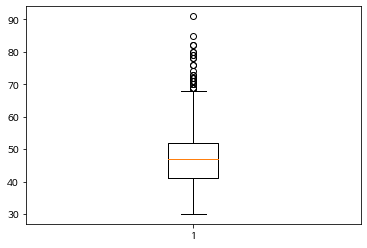

In [58]:
plt.boxplot(mfile[mfile['모바일알람여부'] == "수신"]['연령'])

In [72]:
m = mfile[mfile['모바일알람여부']=="."]
len(m)

10653

In [75]:
# 모바일알람을 이용하지 않는 고객들의 연령대 분포
no_mobile = mfile[mfile['모바일알람여부']=="."]
no_mobile['연령'].describe()

count    10651.000000
mean        49.891184
std         11.726912
min         17.000000
25%         41.000000
50%         48.000000
75%         57.000000
max        108.000000
Name: 연령, dtype: float64

In [76]:
# 모바일알람을 이용하는 고객들의 연령대 분포
mobile = mfile[mfile['모바일알람여부'] == "수신"]
mobile['연령'].describe()

count    902.000000
mean      47.496674
std        9.137954
min       30.000000
25%       41.000000
50%       47.000000
75%       52.000000
max       91.000000
Name: 연령, dtype: float64

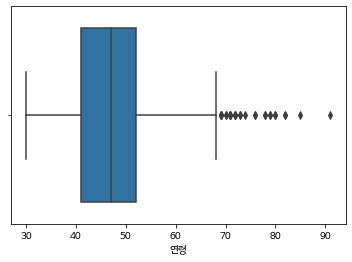

In [78]:
sns.boxplot(mobile['연령'])

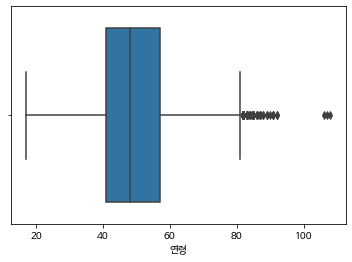

In [77]:
sns.boxplot(no_mobile['연령'])

In [ ]:
번호	조합원상태	주소	성별	연령	배송서비스신청여부	모바일알람여부	Gold_member	구	동
9	1000577024	정상회원	기타-기타	여	47.0	미신청	.	normal	기타	기타
24	1001776000	정상회원	기타-기타	남	57.0	미신청	.	normal	기타	기타
32	1003019520	정상회원	기타-기타	여	72.0	미신청	.	normal	기타	기타
33	1003088192	정상회원	기타-기타	여	66.0	미신청	.	normal	기타	기타
69	1006670272	정상회원	기타-기타	여	72.0	미신청	.	normal	기타	기타
...	...	...	...	...	...	...	...	...	...	...
11493	994387264	정상회원	기타-기타	여	37.0	미신청	.	normal	기타	기타
11519	998470464	정상회원	기타-기타	여	42.0	미신청	.	normal	기타	기타
11538	999398464	정상회원	기타-기타	여	54.0	미신청	.	normal	기타	기타
11539	999474560	정상회원	기타-기타	여	40.0	미신청	.	normal	기타	기타
11549	999654592	정상회원	기타-기타	여	47.0	미신청	.	normal	기타	기타
1126 rows × 10 columns

In [41]:
￼
mfile['조합원상태'].value_counts()

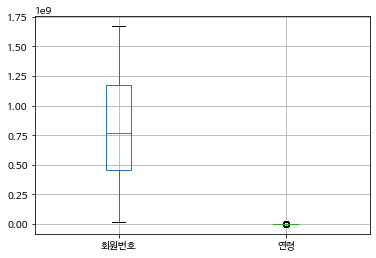

In [7]:
mfile.boxplot()

In [8]:
mfile['구'].value_counts()

수지구       8198
기타        1149
기흥구        696
분당구        670
수원 영통구     216
서울 강남구     173
서울 송파구      95
화성          78
처인구         74
광주          73
수원 장안구      30
수정구         24
중원구         24
수원 팔달구      23
수원 권선구      18
하남          14
Name: 구, dtype: int64

In [10]:
mfile['동'].value_counts().head(30)

풍덕천동    3188
기타      1925
상현동     1601
신봉동     1422
동천동      925
성복동      735
죽전동      261
보정동      259
정자동      130
구미동       89
판교동       82
중동        69
마북동       63
신갈동       61
수내동       60
영덕동       59
서현동       51
언남동       49
야탑동       45
백현동       44
동백동       38
금곡동       35
이매동       31
오포읍       31
분당동       31
삼평동       29
보라동       25
청덕동       25
상하동       21
상갈동       15
Name: 동, dtype: int64

In [12]:
mfile['주소'].value_counts()

수지구-풍덕천동    3188
수지구-상현동     1601
수지구-신봉동     1422
기타-기타       1126
수지구-동천동      924
            ... 
기타-성남동         1
기타-신흥동         1
중원구-은행동        1
기타-금곡동         1
수정구-복정동        1
Name: 주소, Length: 95, dtype: int64

# 주소마다 거리를 계산해 값으로 넣어주고 싶지만 어느 지점인지 안나와 있으므로 지점마다 가장 많이 나오는 동으로 지점을 임의로 정해주기로 한다

In [ ]:
dt1 = pd.read_csv('product_data_01.csv')
dt2 = pd.read_csv('product_data_02.csv')
dt3 = pd.read_csv('product_data_03.csv')
dt4 = pd.read_csv('product_data_04.csv')


In [15]:
dt1.head()

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207.0,매장C,NaN,10:04
1,2018-01-02,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403.0,매장C,NaN,10:09
2,2018-01-02,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083.0,매장C,NaN,10:12
3,2018-01-02,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849.0,매장C,NaN,10:23
4,2018-01-02,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507.0,매장C,NaN,10:29


In [ ]:
# 조합원상태가 겹치므로 제거하고 merging해주기
mfile_abstract_johapwon = mfile.drop(['조합원상태'], axis = 1, inplace = False)

In [30]:
# 조합원상태가 겹치므로 제거하고 merging해주기
mfile_abstract_johapwon = mfile.drop(['조합원상태'], axis = 1, inplace = False)

dt1_merge = pd.merge(dt1, mfile_abstract_johapwon, on = '회원번호', how = 'left')
dt2_merge = pd.merge(dt2, mfile_abstract_johapwon, on = '회원번호', how = 'left')
dt3_merge = pd.merge(dt3, mfile_abstract_johapwon, on = '회원번호', how = 'left')
dt4_merge = pd.merge(dt4, mfile_abstract_johapwon, on = '회원번호', how = 'left')

In [31]:
print(dt1_merge['주소'].isnull().sum())
print(dt2_merge['주소'].isnull().sum())
print(dt3_merge['주소'].isnull().sum())
print(dt4_merge['주소'].isnull().sum())


0
0
0
0


In [22]:
dt1_merge['주소'].value_counts()

수지구-풍덕천동    83625
수지구-성복동      9455
수지구-상현동      6369
수지구-신봉동      6121
기타-기타        4362
            ...  
처인구-김량장동        3
하남-위례동          2
기타-신흥동          2
기흥구-서천동         1
광주-산성동          1
Name: 주소, Length: 77, dtype: int64

In [23]:
dt2_merge['주소'].value_counts()

수지구-신봉동     37104
수지구-성복동      8104
기타-기타        2043
수지구-풍덕천동     1644
수지구-상현동      1381
            ...  
기흥구-구갈동         2
화성-보라동          2
광주-산성동          1
처인구-고림동         1
수정구-단대동         1
Name: 주소, Length: 62, dtype: int64

In [24]:
dt3_merge['주소'].value_counts()

수지구-상현동       34276
수지구-풍덕천동      12287
기흥구-보정동        4401
수지구-성복동        4144
기타-기타          1850
              ...  
중원구-성남동           2
기타-성남동            1
서울 강남구-은행동        1
처인구-원삼면           1
광주-산성동            1
Name: 주소, Length: 72, dtype: int64

In [25]:
dt4_merge['주소'].value_counts()

수지구-동천동     28727
수지구-풍덕천동     9022
기타-기타        2101
수지구-기타       2022
수지구-신봉동      1224
            ...  
처인구-고림동         2
수정구-기타          1
수정구-신흥동         1
수정구-태평동         1
광주-산성동          1
Name: 주소, Length: 73, dtype: int64

## dt1 = 한살림 수지매장(풍덕천동)
## dt2 = 한살림 신봉매장
## dt3 = 한살림 상현매장
## dt4 = 한살림 동천매장

In [32]:
dt1_merge.to_csv('수지매장.csv', encoding = 'utf-8')
dt2_merge.to_csv('신봉매장.csv', encoding = 'utf-8')
dt3_merge.to_csv('상현매장.csv', encoding = 'utf-8')
dt4_merge.to_csv('동천매장.csv', encoding = 'utf-8')


In [44]:
dt4_distance = pd.DataFrame({'위치' : dt4_merge['주소'].unique()})
dt3_distance = pd.DataFrame({'위치' : dt3_merge['주소'].unique()})
dt2_distance = pd.DataFrame({'위치' : dt2_merge['주소'].unique()})
dt1_distance = pd.DataFrame({'위치' : dt1_merge['주소'].unique()})

dt4_distance.to_csv('동천매장_거리.csv', encoding = 'utf-8')
dt3_distance.to_csv('상현매장_거리.csv', encoding = 'utf-8')
dt2_distance.to_csv('신봉매장_거리.csv', encoding = 'utf-8')
dt1_distance.to_csv('수지매장_거리.csv', encoding = 'utf-8')

In [45]:
dt4_distance.tail(40)

,위치
33,분당구-삼평동
34,기흥구-청덕동
35,중원구-여수동
36,기흥구-신갈동
37,기흥구-상갈동
38,기흥구-영덕동
39,수정구-복정동
40,분당구-백현동
41,하남-기타
42,화성-기타


In [37]:
dt1_merge[dt1_merge['주소']=="기타-기타"]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구,동
14,2018-01-02,939239936,정상회원,음료,음료,과즙,상큼한감귤&한라봉(125ml*3개),3.0,11199.0,매장C,NaN,11:59,기타-기타,여,39.0,미신청,수신,normal,기타,기타
79,2018-01-02,939239936,정상회원,반찬,어묵/묵,어묵,두부연어묵(270g),1.0,7275.0,매장C,NaN,11:59,기타-기타,여,39.0,미신청,수신,normal,기타,기타
90,2018-01-02,830780864,정상회원,채소,뿌리채소,월동무,월동무(1.2kg이상),1.0,3733.0,매장C,NaN,13:09,기타-기타,여,54.0,미신청,.,normal,기타,기타
91,2018-01-02,1373159744,정상회원,채소,잎/줄기채소,시금치,시금치(300g),1.0,4403.0,매장C,NaN,13:15,기타-기타,여,35.0,미신청,.,normal,기타,기타
107,2018-01-02,434291008,정상회원,축산물,육가공,햄/소시지/훈제,꼬마소시지(300g)-매장,1.0,8041.0,매장C,NaN,15:25,기타-기타,여,64.0,미신청,.,normal,기타,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123085,2018-10-31,1358514048,정상회원,과실,과일,귤(조생),귤/유(3kg),1.0,19718.0,매장C,NaN,11:02,기타-기타,여,38.0,미신청,.,normal,기타,기타
123112,2018-10-31,1284847552,정상회원,음료,음료,뿌리차,돼지감자차(70g),1.0,7849.0,매장C,NaN,17:11,기타-기타,여,32.0,미신청,수신,normal,기타,기타
123146,2018-10-31,486008448,정상회원,축산물,육가공,식육추출가공,육수용한우곰국(300g*3봉),1.0,13592.0,매장C,NaN,19:55,기타-기타,여,42.0,미신청,수신,VIP,기타,기타
123158,2018-10-31,22270144,정상회원,채소,잎/줄기채소,양배추,양배추(1통:1kg이상),1.0,4882.0,매장C,NaN,10:42,기타-기타,여,52.0,미신청,수신,VIP,기타,기타


In [47]:
dt4_dist = pd.read_csv('동천매장_거리.csv')
dt3_dist = pd.read_csv('상현매장_거리.csv')
dt2_dist = pd.read_csv('신봉매장_거리.csv')
dt1_dist = pd.read_csv('수지매장_거리.csv')

dt4_dist.head()

,위치,거리,구
0,광주-기타,29,광주
1,광주-산성동,24,광주
2,광주-오포읍,20,광주
3,기타-금광동,25,중원구
4,기타-기타,17,성남


In [48]:
dt3_dist.head()

,위치,거리,구
0,광주-기타,28,광주
1,광주-산성동,23,수정구
2,광주-오포읍,20,광주
3,기타-기타,17,성남
4,기타-동백동,13,성남


In [49]:
dt2_dist.head()

,위치,거리,구
0,광주-기타,30,광주
1,광주-산성동,26,수정구
2,광주-오포읍,22,광주
3,기타-궁내동,15,분당구
4,기타-금곡동,12,분당구


In [50]:
dt1_dist.head()

,위치,거리,구
0,광주-기타,26,광주
1,광주-산성동,22,수정구
2,광주-오포읍,17,광주
3,기타-금광동,22,중원구
4,기타-기타,16,성남
